In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir, mkdir
from scipy import interpolate
from matplotlib.ticker import LinearLocator
from glob import glob
import sys

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [13]:
from utils import safe_mkdir, style

In [14]:
style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness-v")
spectral_dir = join(root_data_dir, "Spectral-Class-v")

In [6]:
name = "Effective-Volume-v"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume-v already exist. Good to go!


In [7]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-v/gaia_(0.34)_(0.36).hdf5',
 '/home2/

In [8]:
name = files[2].split("/")[-1]
name

'gaia_(0.10)_(0.14).hdf5'

In [9]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


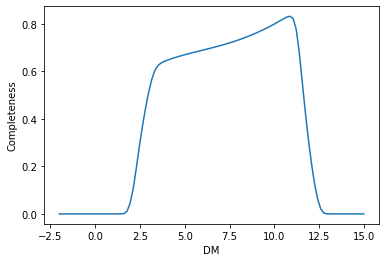

In [10]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

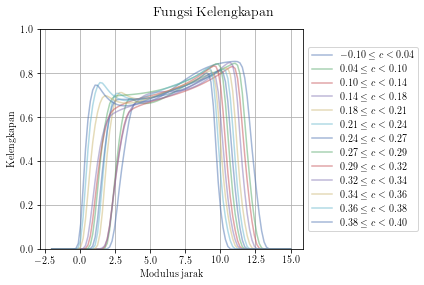

'gaia_(0.38)_(0.40).hdf5'

In [31]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig("fungsi-kelengkapan.pdf", dpi=200)
plt.show()

name

In [73]:
# interpolate compDM, set to 0 if beyong the range
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

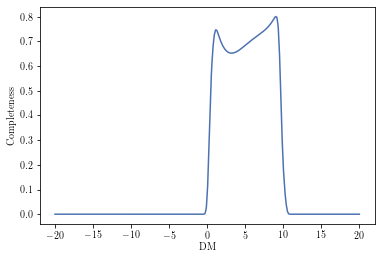

In [74]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [75]:
zb= [162.0,
 186.0,
 186.0,
 219.0,
 225.0,
 241.0,
 281.0,
 346.0,
 438.0,
 523.0,
 572.0,
 578.0,
 573.0]

Z = zb[0]
R = 150

In [76]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [77]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        if distance>50:
            eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 400.90it/s]


(0.0, 1.0)

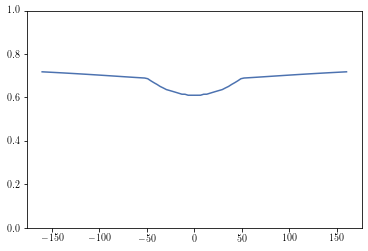

In [78]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

100%|██████████| 99/99 [00:00<00:00, 468.89it/s]


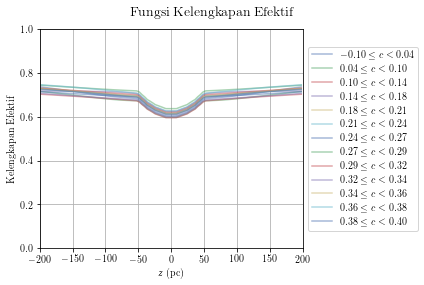

In [86]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 200
R = 150
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-200, 200)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig("fungsi-kelengkapan-efektif.pdf", dpi=200)

In [18]:
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

In [60]:
gaia_raw = vaex.open(join(spectral_dir, name))
gaia_raw = gaia_raw.dropna()

In [70]:
for i, zbound in enumerate(zb):
    name = files[i].split("/")[-1] 
    c = regex.findall(name)
    gaia_raw = vaex.open(join(spectral_dir, name))
    # filter no nan in 'z'
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.dropna("z")
    gaia = gaia.extract()
    N_d_50 = len(gaia)
    gaia = gaia_raw.filter("abs(z)<50")
    gaia = gaia.dropna("w")
    gaia = gaia.extract()
    N_z_50 = len(gaia)
    w = gaia["w"].to_numpy()

    dispersion = np.std(w)
    print(f"{c[0]} < c < {c[1]} & {zbound} & {N_d_50} & {N_z_50} & {dispersion:.02f} \\\\")

-0.10 < c < 0.04 & 162.0 & 995 & 350 & 5.37 \\
0.04 < c < 0.10 & 186.0 & 1182 & 422 & 6.49 \\
0.10 < c < 0.14 & 186.0 & 1306 & 486 & 7.49 \\
0.14 < c < 0.18 & 219.0 & 1719 & 561 & 8.00 \\
0.18 < c < 0.21 & 225.0 & 2756 & 933 & 9.41 \\
0.21 < c < 0.24 & 241.0 & 4065 & 1242 & 10.57 \\
0.24 < c < 0.27 & 281.0 & 5866 & 1663 & 12.62 \\
0.27 < c < 0.29 & 346.0 & 8990 & 2055 & 14.36 \\
0.29 < c < 0.32 & 438.0 & 12396 & 2319 & 16.50 \\
0.32 < c < 0.34 & 523.0 & 14847 & 2343 & 17.75 \\
0.34 < c < 0.36 & 572.0 & 17069 & 2491 & 19.59 \\
0.36 < c < 0.38 & 578.0 & 18013 & 2622 & 19.89 \\
0.38 < c < 0.40 & 573.0 & 15174 & 2213 & 20.20 \\


In [71]:
name = files[12].split("/")[-1] 
gaia_raw = vaex.open(join(spectral_dir, name))
gaia = gaia_raw.filter("Dist>50")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.005220332152592599,-1.2472149363756106,9.679,9.292,AAA,4702044747287925888,5.953322,-4.878325554768022,0.012328528,-3.412328263413079,0.013413801,5.906541504010318,0.011774631,10.679057,11.017059,10.182057,1367.9883,2529.5535,0.9734569,1.1965036,2.2437111273254207,-0.7874142381555977,168.7038,168.3756,169.0502,0.0721,0.0702,0.0741,G,--,27.62563133239746,0.3174717426300049,gaia,5805.04541015625,3.2939453125,3.57666015625,0.0,gspphot,4.456299781799316,0.001399993896484375,0.0011000633239746094,0.0,gspphot,0.37929999828338623,0.0034999847412109375,0.003899991512298584,0.0,gspphot,0.10999999940395355,0.030000001192092896,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.38700008,3.535666200843578,169.30381329260751,-119.95698715315031,119.47427517485526,3.7553728541694067,4.619439264862996,0.012413464985366399,0.013335236777091612,3.7071003565426492,3.013686997150049,0.013005222340576255,0.011633172738116492,-16.95758836676508,0.2251256911385725,22.12144426456764,0.22422280518725107,-11.430860769031623,0.14004669026873773,-19.17748752433899,0.17549393613104425,2.9564801601290416,4.251074279634666
1,0.01234528975800905,-1.231587904025077,9.754,9.366,AAA,4702904286207624320,31.48447,31.093736648384194,0.014331686,-4.944838937083015,0.013836097,6.588620257673664,0.013783502,10.734539,11.055819,10.25146,1114.0681,1807.6669,1.0403253,1.1962733,2.2465928384637257,-0.8030835776899604,151.4281,151.1048,151.7459,0.0002,0.0,0.0006,G,--,17.690340042114258,0.28922533988952637,gaia,5792.77978515625,1.9619140625,2.11181640625,0.0,gspphot,4.427499771118164,0.002899646759033203,0.0029001235961914062,0.0,gspphot,-0.27799999713897705,0.005800008773803711,0.006399989128112793,0.0,gspphot,0.09000000357627869,0.04000000283122063,0.03999999165534973,0.0,gspspec,-0.2199999988079071,0.1599999964237213,0.12999999523162842,0.0,gspspec,-0.2199999988079071,nan,nan,nan,--,0.38799953,3.8479720962427164,151.776845665876,-109.20359622369978,105.40771059127644,-31.27491570549239,-3.6265049961509788,0.014296200205580537,0.013872760057340682,-2.60898837836877,-22.499870177125093,-0.011375328765021682,-0.048180656200071,-14.540137748021865,0.2082478308994546,10.408618805232711,0.20103118231855613,-24.06538885207155,0.1312472725530063,5.95319769692874,0.1597155763964895,2.976753810032051,4.256824848722696
2,0.01153959341541091,-1.0330015666596515,9.678,9.281,AAA,4918240000670334976,32.44932,22.40143425623171,0.0130547555,23.47624591229154,0.012260078,6.505179098274429,0.011432906,10.809147,11.172587,10.279581,2179.1572,3967.986,0.9897304,1.2044604,2.344795342837368,-0.9921726080540599,153.0987,152.807,153.4229,0.0246,0.0191,0.0343,G,--,15.323904037475586,0.24891114234924316,gaia,5503.70849609375,10.142578125,17.52490234375,0.0,gspphot,4.378300189971924,0.005100250244140625,0.009399890899658203,0.0,gspphot,0.1014999970793724,0.009599998593330383,0.01990000158548355,0.0,gspphot,-0.019999999552965164,0.019999999552965164,0.029999999329447746,0.0,gspspec,-0.07999999821186066,0.14000000059604645,0.12999999895691872,0.0,gspspec,-0.07999999821186066,nan,nan,nan,--,0.3970003,3.7442967396504105,153.72366923229848,-128.69992968835538,84.06720276334576,-12.96271802984981,-29.747711174967115,0.012963330268760525,0

In [72]:
zedge = np.linspace(-Z, Z, 20) #edges
zmid = (zedge[:-1]+zedge[1:])/2
zs = gaia["z"].to_numpy()
dz = zedge[1]-zedge[0]
znum, _ = np.histogram(zs, bins=zedge)
zcor = znum/compz(zmid)

zs = gaia_raw["z"].to_numpy()
znum_raw, _ = np.histogram(zs, bins=zedge)

dz = zedge[1]-zedge[0]
plt.bar(zmid, zcor, width=dz, edgecolor="k", alpha=0.5, color="r")
plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
plt.yscale("log")
dz


NameError: name 'compz' is not defined

# automate

In [21]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-2/gaia_(0.34)_(0.36).hdf5',
 '/home2/

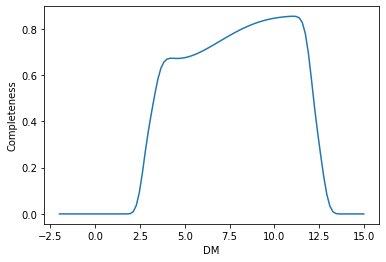

100%|██████████| 99/99 [00:00<00:00, 427.96it/s]


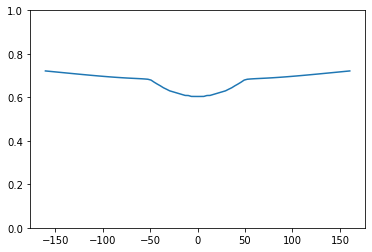

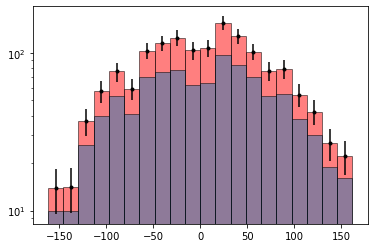

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

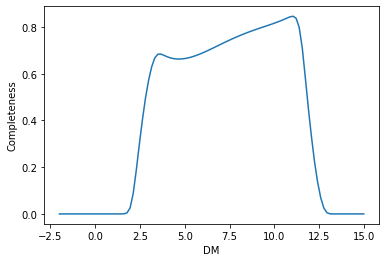

100%|██████████| 99/99 [00:00<00:00, 458.98it/s]


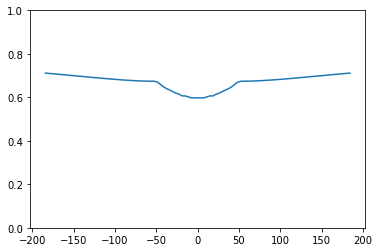

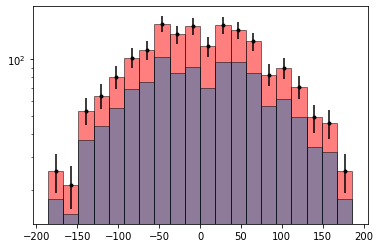

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

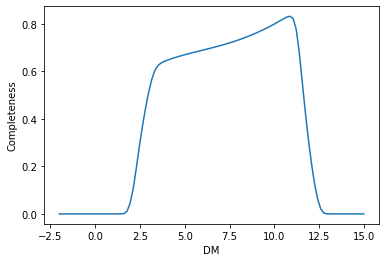

100%|██████████| 99/99 [00:00<00:00, 464.88it/s]


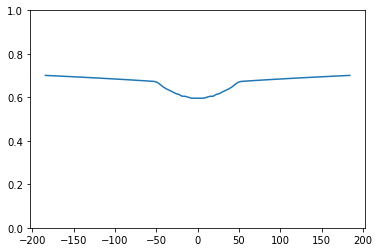

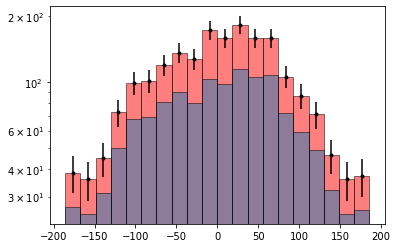

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

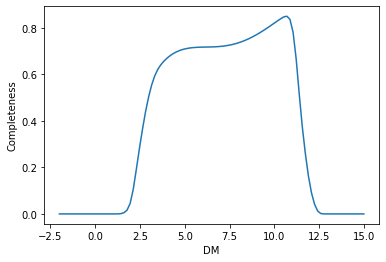

100%|██████████| 99/99 [00:00<00:00, 465.17it/s]


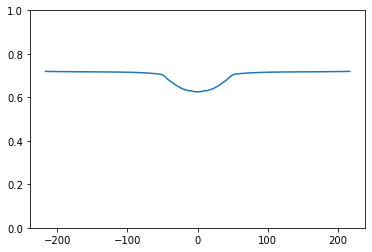

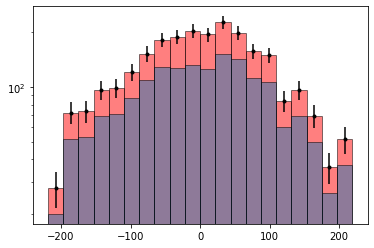

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

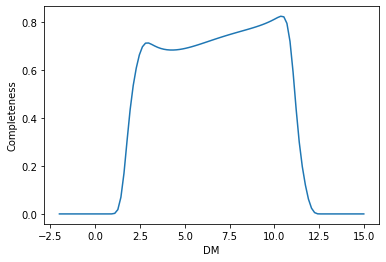

100%|██████████| 99/99 [00:00<00:00, 480.76it/s]


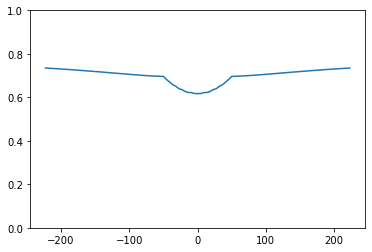

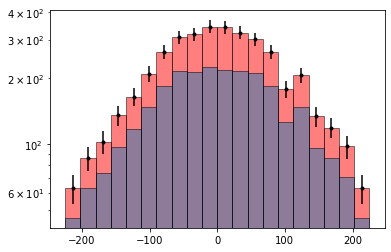

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

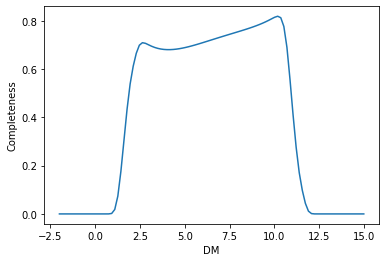

100%|██████████| 99/99 [00:00<00:00, 471.79it/s]


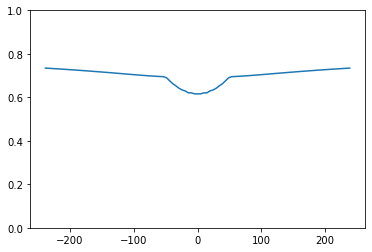

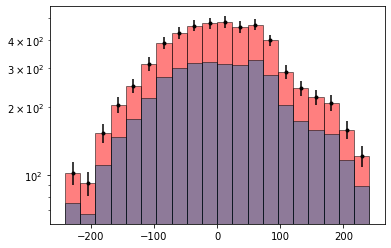

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

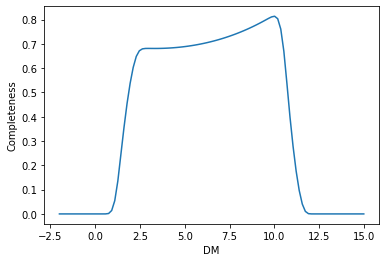

100%|██████████| 99/99 [00:00<00:00, 452.41it/s]


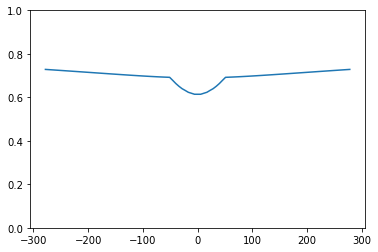

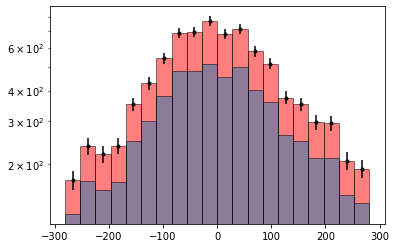

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

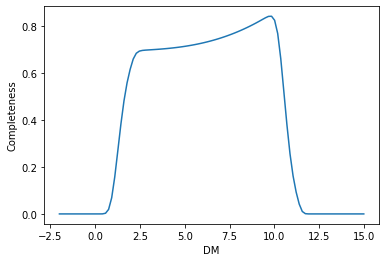

100%|██████████| 99/99 [00:00<00:00, 443.91it/s]


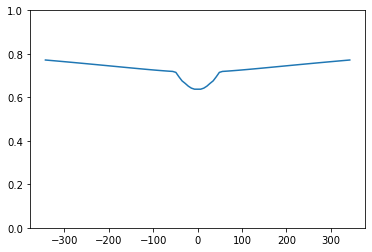

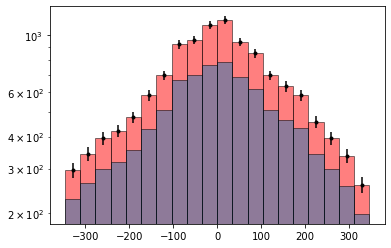

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

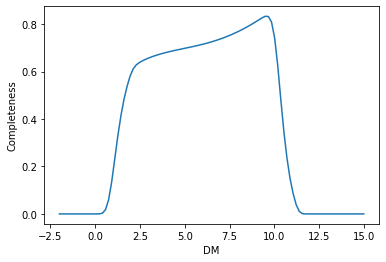

100%|██████████| 99/99 [00:00<00:00, 443.13it/s]


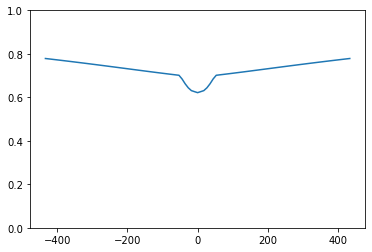

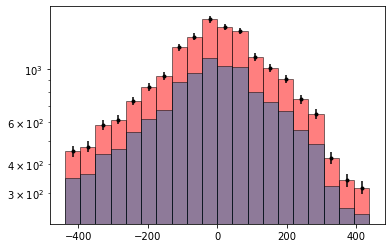

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

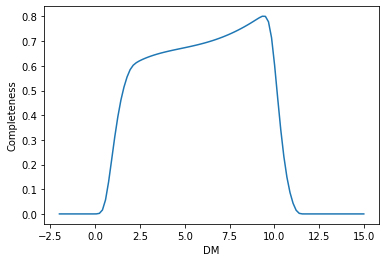

100%|██████████| 99/99 [00:00<00:00, 460.62it/s]


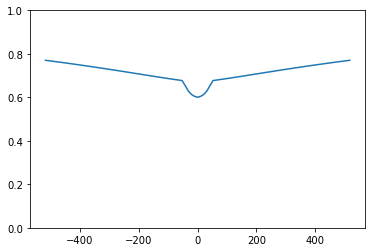

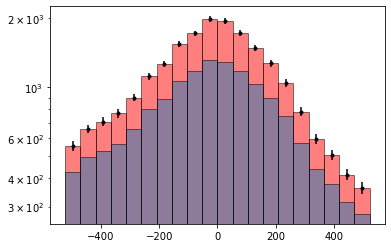

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

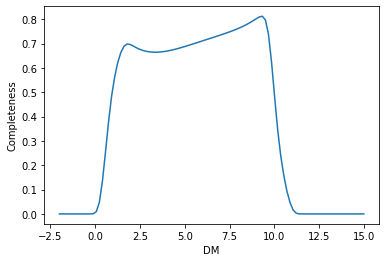

100%|██████████| 99/99 [00:00<00:00, 416.55it/s]


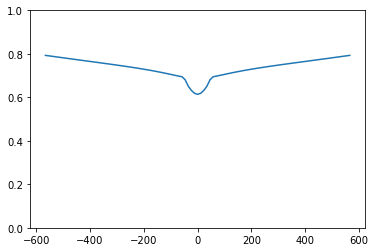

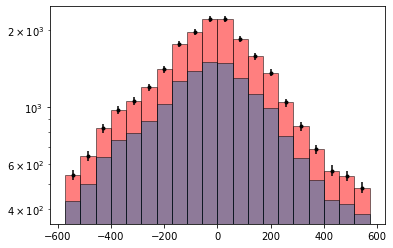

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

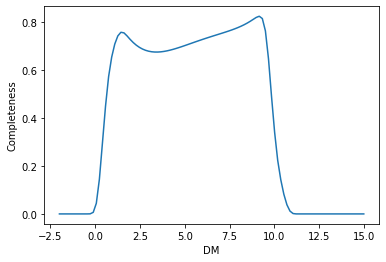

100%|██████████| 99/99 [00:00<00:00, 449.51it/s]


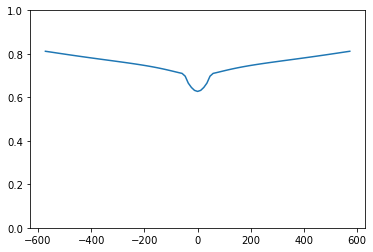

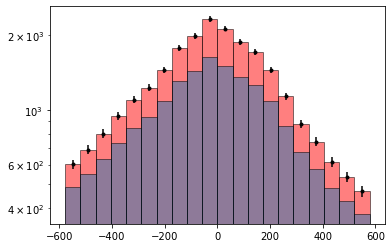

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

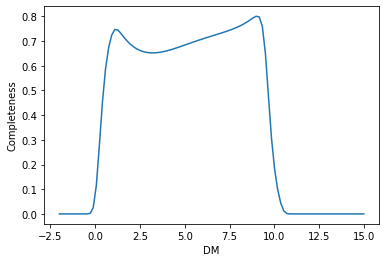

100%|██████████| 99/99 [00:00<00:00, 426.52it/s]


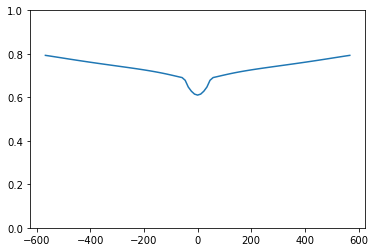

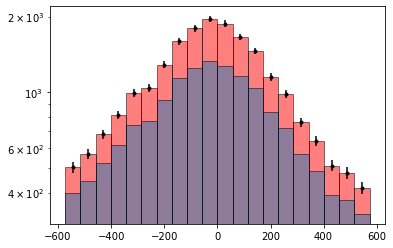

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [23]:
zs = [162.0,
 186.0,
 186.0,
 219.0,
 225.0,
 241.0,
 281.0,
 346.0,
 438.0,
 523.0,
 572.0,
 578.0,
 573.0]

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

for file, Z in zip(files, zs):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]

    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # plot
    plt.plot(DM, compDM)
    plt.xlabel("DM")
    plt.ylabel("Completeness")
    plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()
    gaia

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    plt.bar(zmid, znum_cor, width=dz, edgecolor="k", alpha=0.5, color="r")
    plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
    plt.errorbar(zmid, znum_cor, yerr=zerr, fmt=".", color="k")
    plt.yscale("log")
    plt.show()
    df = vaex.from_arrays(z=zmid, znum=znum_cor, znum_raw=znum_raw, err=zerr)
    # df.export(join(data_dir, name), progress=True)
    # break


# all out

 92%|█████████▏| 11/12 [00:03<00:00,  3.20it/s]


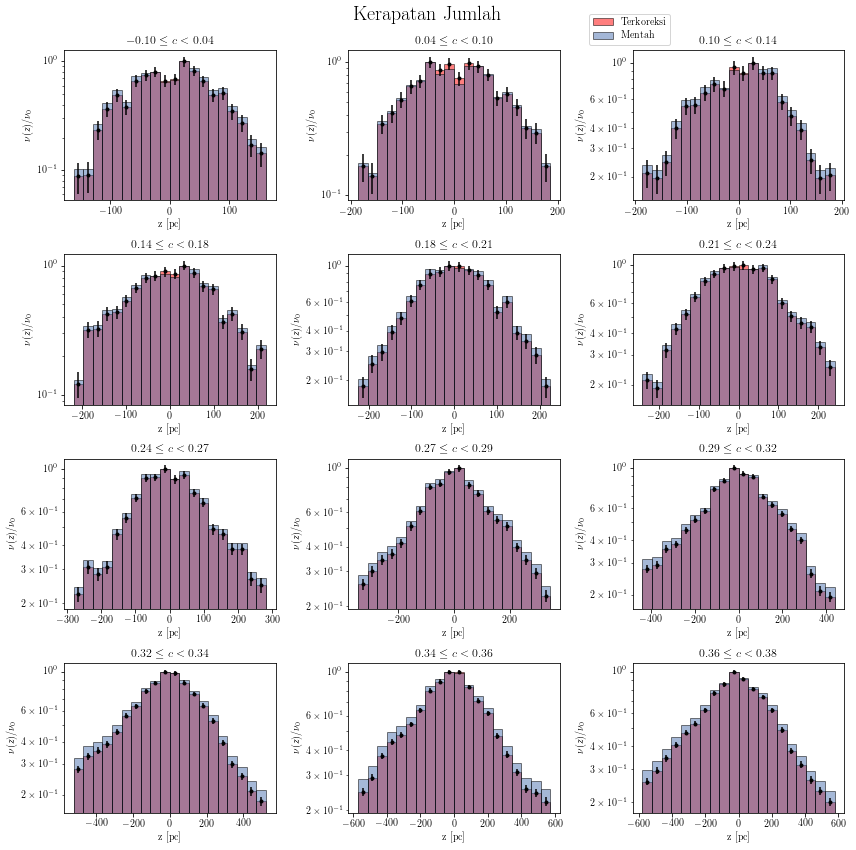

In [109]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

zs = [162.0,
 186.0,
 186.0,
 219.0,
 225.0,
 241.0,
 281.0,
 346.0,
 438.0,
 523.0,
 572.0,
 578.0,
 573.0]

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, Z, ax) in enumerate(zip(files[:-1], tqdm(zs[:-1]), axes.flatten())):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    ax.bar(zmid, znum_cor/znum_cor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    ax.errorbar(zmid, znum_cor/znum_cor.max(), yerr=zerr/znum_cor.max(), fmt=".", color="k")
    ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    # df.export(join(data_dir, name), progress=True)
    if i==2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right", bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig("kerapatan-jumlah.pdf", bbox_inches="tight")
